
              <<<<-----Let calculate result----->>>>


        


Please enter Total Subjects range:     7
Enter Max Marks of one Subject:    100
Enter Passing Marks Criteria:    40
Enter Subject 1 Name:    Math
Enter your Math Marks:    68
Enter Subject 2 Name:    Isl
Enter your Isl Marks:    98
Enter Subject 3 Name:    Urdu
Enter your Urdu Marks:    49
Enter Subject 4 Name:    Eng
Enter your Eng Marks:    57
Enter Subject 5 Name:    Sci
Enter your Sci Marks:    39
Enter Subject 6 Name:    Comp
Enter your Comp Marks:    58
Enter Subject 7 Name:    S.St
Enter your S.St Marks:    46




------------------------------------------------------------------------------------

                                  YOUR RESULT
                            -----------------------
                            Total Marks:  700
                            Obt Marks  :  415
                            Percentage :  59.29%
                            Grade      :  Pass
                            Result     :  Pass

                            _______________________
                            Subjects   :  Pass/Fail
                              |              |
                              v              v
                            -----------------------
                             Math     :     Pass
                             Isl     :     Pass
                             Urdu     :     Pass
                             Eng     :     Pass
                             Sci     :     Fail
                             Comp     :     Pass
                             S.St    

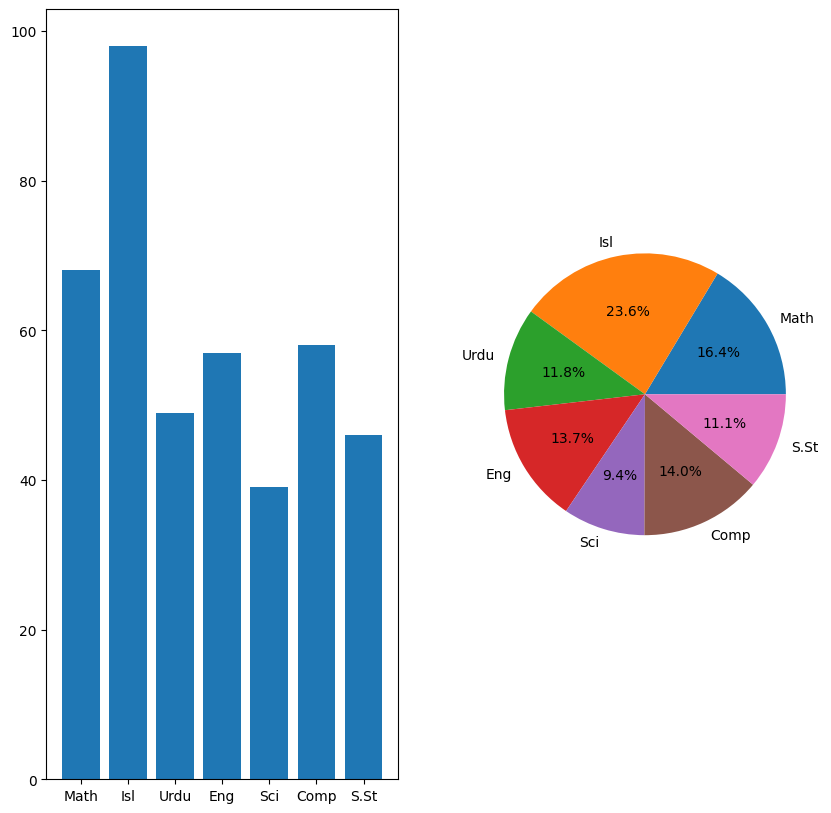

In [4]:
import matplotlib.pyplot as plt

res_dict = {}
Result = None
Grade = None
per = None
main_dict = {}
visx = []
visy = []
print("""
              <<<<-----Let calculate result----->>>>


        """)
Sub_tot = eval(input("Please enter Total Subjects range:    "))
maxmarks = int(input("Enter Max Marks of one Subject:   "))
passmarks =  int(input("Enter Passing Marks Criteria:   "))
for i in range(1,int(Sub_tot+1)):
  name_sub = input(f"Enter Subject {i} Name:   ")
  marks_sub = int(input(f"Enter your {name_sub} Marks:   "))
  main_dict[name_sub] = int(marks_sub)


  #Seperate Result Calculate all Subject.
  if marks_sub > passmarks:
    Result = "Pass"
    res_dict[name_sub] = Result
  else:
    Result = "Fail"
    res_dict[name_sub] = Result

  #Result Calculate
  if marks_sub >= passmarks:
    continue
  else:
    Result = "Fail"



total = sum(main_dict.values())


#percentage Calculate.
per =(total/(maxmarks*Sub_tot))*100

#grade Calculate.
if per >= 90:
  Grade = "A"
elif per >= 80:
  Grade = "B"
elif per >= 70:
  Grade = "C"
elif per >= 60:
  Grade = "D"
elif per >= 50:
  Grade = "E"
elif per < 50:
  Grade = "F"


if Result == "Pass":
  Grade = "Pass"
else:
  Grade = "Fail"
#RESULT PRINT

print(f"""

------------------------------------------------------------------------------------

                                  YOUR RESULT
                            -----------------------
                            Total Marks:  {maxmarks*Sub_tot}
                            Obt Marks  :  {total}
                            Percentage :  {per:.2f}%
                            Grade      :  {Grade}
                            Result     :  {Result}

                            _______________________
                            Subjects   :  Pass/Fail
                              |              |
                              v              v
                            -----------------------""")

for b in main_dict:
  print(f"""                             {b}     :     {res_dict[b]}""")
print("""
                            _______________________
                            Subjects   :  Marks
                              |              |
                              v              v
                            -----------------------""")

for b in main_dict:
  print(f"""                            {b}     :     {main_dict[b]}""")
  visx.append(b)
  visy.append(main_dict[b])


print("Visualization Of result")

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.bar(visx,visy)



plt.subplot(1,2,2)
plt.pie(visy, labels=visx,autopct="%1.1f%%")

plt.show()

In [2]:
import matplotlib.pyplot as plt

🎓 Student Result Calculator Pro v2.0
Application started successfully!
Features loaded:
✅ Modern GUI Interface
✅ Real-time Validation
✅ Data Visualization
✅ Export/Import Functionality
✅ Results History
✅ Performance Analytics


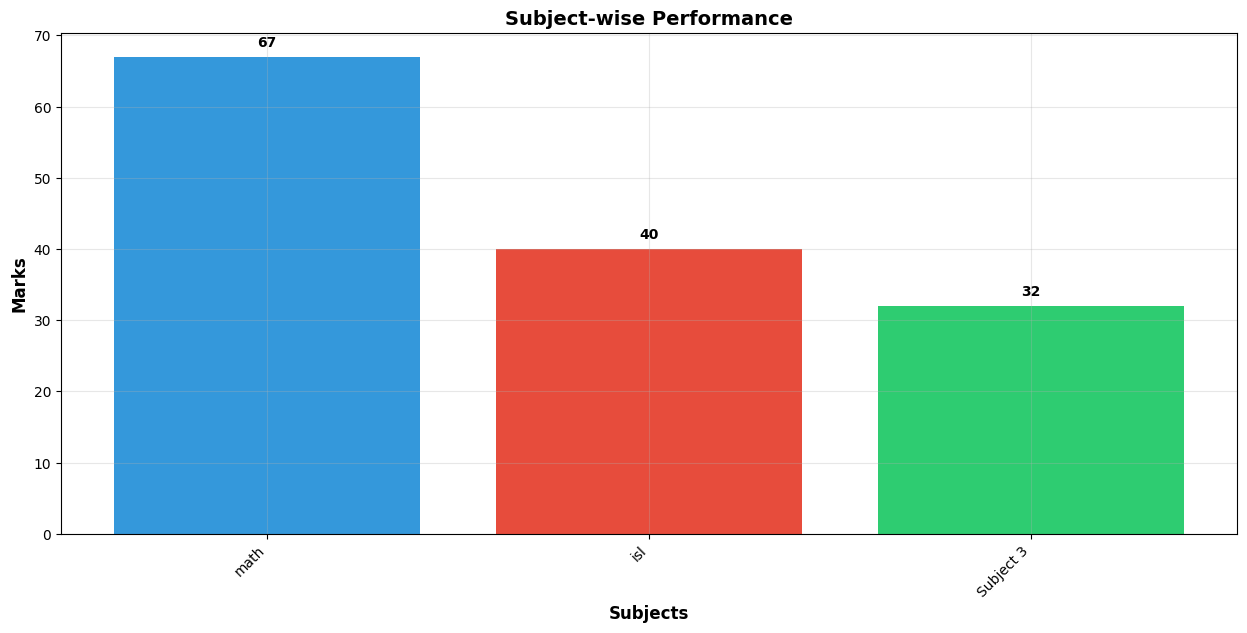

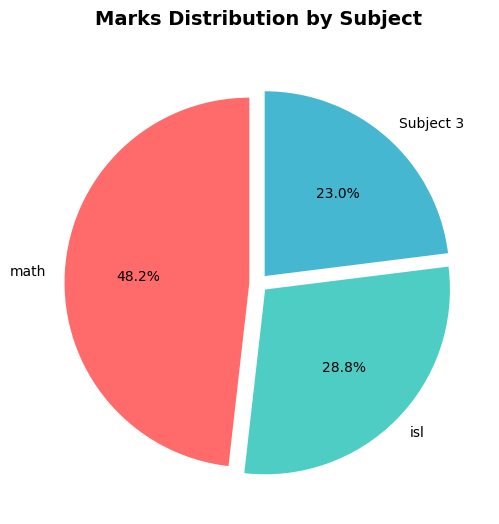

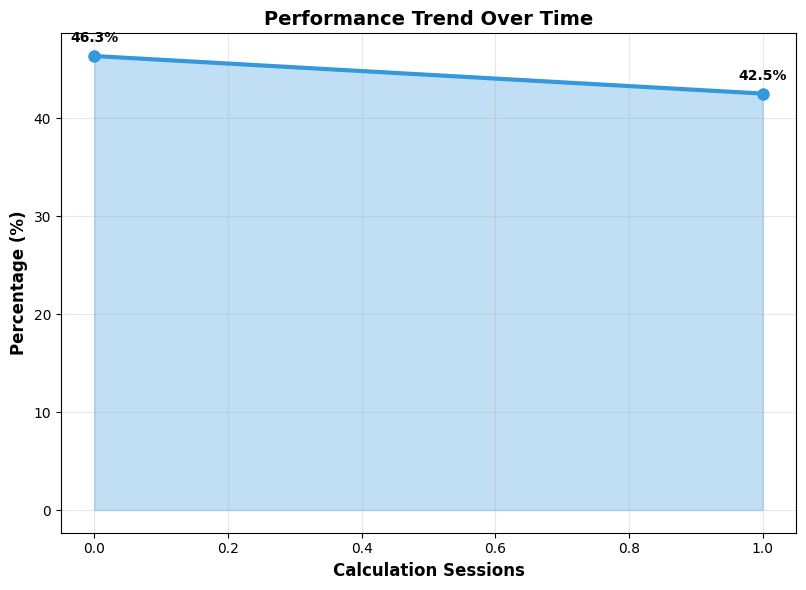

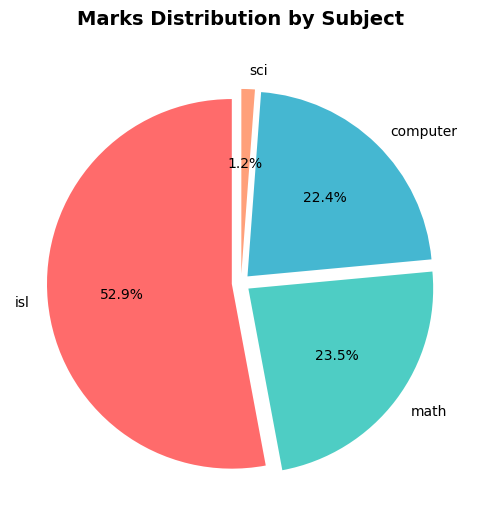

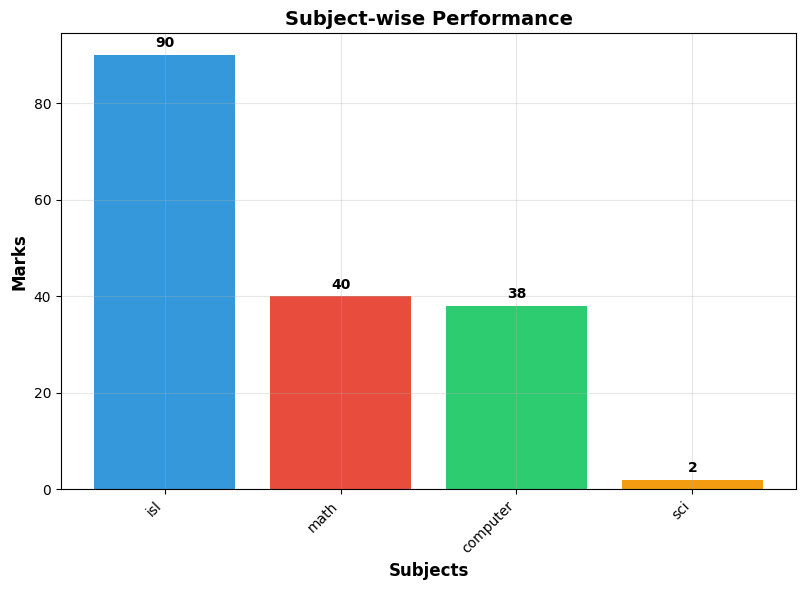

In [1]:
import tkinter as tk
from tkinter import ttk, messagebox, filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import json
import csv
from datetime import datetime
import os

class StudentResultCalculator:
    def __init__(self, root):
        self.root = root
        self.root.title("Student Result Calculator Pro v2.0")
        self.root.geometry("1200x800")
        self.root.configure(bg='#f0f2f5')
        
        # Configure style
        self.style = ttk.Style()
        self.style.theme_use('clam')
        self.configure_styles()
        
        # Data storage
        self.subjects_data = {}
        self.results_history = []
        
        # Create GUI
        self.create_widgets()
        
    def configure_styles(self):
        # Configure modern styles
        self.style.configure('Title.TLabel', 
                           font=('Arial', 24, 'bold'),
                           foreground='#2c3e50',
                           background='#f0f2f5')
        
        self.style.configure('Heading.TLabel',
                           font=('Arial', 12, 'bold'),
                           foreground='#34495e',
                           background='#f0f2f5')
        
        self.style.configure('Modern.TButton',
                           font=('Arial', 10, 'bold'),
                           foreground='white')
        
        # Configure button colors
        self.style.map('Modern.TButton',
                      background=[('active', '#3498db'),
                                ('pressed', '#2980b9'),
                                ('!active', '#3498db')])
                                
    def create_widgets(self):
        # Main container with padding
        main_frame = ttk.Frame(self.root, padding="20")
        main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
        
        # Configure grid weights
        self.root.columnconfigure(0, weight=1)
        self.root.rowconfigure(0, weight=1)
        main_frame.columnconfigure(1, weight=1)
        
        # Title
        title_label = ttk.Label(main_frame, text="🎓 Student Result Calculator Pro",
                               style='Title.TLabel')
        title_label.grid(row=0, column=0, columnspan=3, pady=(0, 30))
        
        # Left Panel - Input Section
        self.create_input_panel(main_frame)
        
        # Middle Panel - Subject Entry
        self.create_subject_panel(main_frame)
        
        # Right Panel - Results and Visualization
        self.create_results_panel(main_frame)
        
        # Bottom Panel - Action Buttons
        self.create_action_panel(main_frame)
        
    def create_input_panel(self, parent):
        # Input frame
        input_frame = ttk.LabelFrame(parent, text="📊 Configuration", padding="15")
        input_frame.grid(row=1, column=0, sticky=(tk.W, tk.E, tk.N), padx=(0, 10))
        
        # Total subjects
        ttk.Label(input_frame, text="Total Subjects:", style='Heading.TLabel').grid(row=0, column=0, sticky=tk.W, pady=5)
        self.total_subjects_var = tk.StringVar(value="5")
        subjects_spinbox = ttk.Spinbox(input_frame, from_=1, to=20, width=15, 
                                     textvariable=self.total_subjects_var,
                                     font=('Arial', 11))
        subjects_spinbox.grid(row=0, column=1, sticky=tk.W, padx=(10, 0), pady=5)
        
        # Max marks
        ttk.Label(input_frame, text="Max Marks per Subject:", style='Heading.TLabel').grid(row=1, column=0, sticky=tk.W, pady=5)
        self.max_marks_var = tk.StringVar(value="100")
        max_marks_spinbox = ttk.Spinbox(input_frame, from_=50, to=1000, width=15,
                                       textvariable=self.max_marks_var,
                                       font=('Arial', 11))
        max_marks_spinbox.grid(row=1, column=1, sticky=tk.W, padx=(10, 0), pady=5)
        
        # Passing marks
        ttk.Label(input_frame, text="Passing Marks:", style='Heading.TLabel').grid(row=2, column=0, sticky=tk.W, pady=5)
        self.pass_marks_var = tk.StringVar(value="33")
        pass_marks_spinbox = ttk.Spinbox(input_frame, from_=1, to=100, width=15,
                                        textvariable=self.pass_marks_var,
                                        font=('Arial', 11))
        pass_marks_spinbox.grid(row=2, column=1, sticky=tk.W, padx=(10, 0), pady=5)
        
        # Student name
        ttk.Label(input_frame, text="Student Name:", style='Heading.TLabel').grid(row=3, column=0, sticky=tk.W, pady=5)
        self.student_name_var = tk.StringVar(value="")
        student_name_entry = ttk.Entry(input_frame, width=20, textvariable=self.student_name_var,
                                     font=('Arial', 11))
        student_name_entry.grid(row=3, column=1, sticky=tk.W, padx=(10, 0), pady=5)
        
        # Generate subjects button
        generate_btn = ttk.Button(input_frame, text="📝 Generate Subject Fields",
                                 command=self.generate_subject_fields,
                                 style='Modern.TButton')
        generate_btn.grid(row=4, column=0, columnspan=2, pady=(15, 0), sticky=tk.EW)
        
    def create_subject_panel(self, parent):
        # Subject entry frame
        self.subject_frame = ttk.LabelFrame(parent, text="📚 Subject Marks Entry", padding="15")
        self.subject_frame.grid(row=1, column=1, sticky=(tk.W, tk.E, tk.N, tk.S), padx=10)
        
        # Scrollable frame for subjects
        canvas = tk.Canvas(self.subject_frame, bg='white', height=400)
        scrollbar = ttk.Scrollbar(self.subject_frame, orient="vertical", command=canvas.yview)
        self.scrollable_frame = ttk.Frame(canvas)
        
        self.scrollable_frame.bind(
            "<Configure>",
            lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
        )
        
        canvas.create_window((0, 0), window=self.scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        
        canvas.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
        scrollbar.grid(row=0, column=1, sticky=(tk.N, tk.S))
        
        self.subject_frame.columnconfigure(0, weight=1)
        self.subject_frame.rowconfigure(0, weight=1)
        
        self.subject_entries = []
        
    def create_results_panel(self, parent):
        # Results frame
        results_frame = ttk.LabelFrame(parent, text="📈 Results & Analytics", padding="15")
        results_frame.grid(row=1, column=2, sticky=(tk.W, tk.E, tk.N, tk.S), padx=(10, 0))
        
        # Results display
        self.results_text = tk.Text(results_frame, height=20, width=40, 
                                   font=('Consolas', 10), bg='#f8f9fa',
                                   relief='flat', bd=1)
        self.results_text.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S), pady=(0, 10))
        
        # Visualization frame
        viz_frame = ttk.Frame(results_frame)
        viz_frame.grid(row=1, column=0, sticky=(tk.W, tk.E))
        
        # Chart buttons
        chart_btn_frame = ttk.Frame(viz_frame)
        chart_btn_frame.grid(row=0, column=0, columnspan=2, pady=(0, 10))
        
        ttk.Button(chart_btn_frame, text="📊 Bar Chart", 
                  command=self.show_bar_chart).grid(row=0, column=0, padx=5)
        ttk.Button(chart_btn_frame, text="🥧 Pie Chart", 
                  command=self.show_pie_chart).grid(row=0, column=1, padx=5)
        ttk.Button(chart_btn_frame, text="📈 Performance Trend", 
                  command=self.show_performance_chart).grid(row=0, column=2, padx=5)
        
        results_frame.columnconfigure(0, weight=1)
        results_frame.rowconfigure(0, weight=1)
        
    def create_action_panel(self, parent):
        # Action buttons frame
        action_frame = ttk.Frame(parent)
        action_frame.grid(row=2, column=0, columnspan=3, pady=(20, 0), sticky=tk.EW)
        
        # Main action buttons
        ttk.Button(action_frame, text="🧮 Calculate Results", 
                  command=self.calculate_results,
                  style='Modern.TButton').grid(row=0, column=0, padx=5, pady=5)
        
        ttk.Button(action_frame, text="🔄 Clear All", 
                  command=self.clear_all).grid(row=0, column=1, padx=5, pady=5)
        
        ttk.Button(action_frame, text="💾 Save Results", 
                  command=self.save_results).grid(row=0, column=2, padx=5, pady=5)
        
        ttk.Button(action_frame, text="📂 Load Results", 
                  command=self.load_results).grid(row=0, column=3, padx=5, pady=5)
        
        ttk.Button(action_frame, text="📊 Export Report", 
                  command=self.export_report).grid(row=0, column=4, padx=5, pady=5)
        
        ttk.Button(action_frame, text="📜 View History", 
                  command=self.view_history).grid(row=0, column=5, padx=5, pady=5)
        
        # Configure grid weights for centering
        for i in range(6):
            action_frame.columnconfigure(i, weight=1)
            
    def generate_subject_fields(self):
        # Clear existing entries
        for widget in self.scrollable_frame.winfo_children():
            widget.destroy()
        self.subject_entries.clear()
        
        try:
            total_subjects = int(self.total_subjects_var.get())
            
            # Create header
            header_frame = ttk.Frame(self.scrollable_frame)
            header_frame.grid(row=0, column=0, sticky=(tk.W, tk.E), pady=(0, 10))
            
            ttk.Label(header_frame, text="Subject Name", 
                     style='Heading.TLabel').grid(row=0, column=0, padx=10)
            ttk.Label(header_frame, text="Marks Obtained", 
                     style='Heading.TLabel').grid(row=0, column=1, padx=10)
            ttk.Label(header_frame, text="Status", 
                     style='Heading.TLabel').grid(row=0, column=2, padx=10)
            
            # Create subject entry fields
            for i in range(total_subjects):
                row_frame = ttk.Frame(self.scrollable_frame)
                row_frame.grid(row=i+1, column=0, sticky=(tk.W, tk.E), pady=2)
                
                # Subject name
                subject_var = tk.StringVar(value=f"Subject {i+1}")
                subject_entry = ttk.Entry(row_frame, textvariable=subject_var, width=20,
                                        font=('Arial', 10))
                subject_entry.grid(row=0, column=0, padx=5)
                
                # Marks entry
                marks_var = tk.StringVar()
                marks_entry = ttk.Entry(row_frame, textvariable=marks_var, width=15,
                                      font=('Arial', 10))
                marks_entry.grid(row=0, column=1, padx=5)
                
                # Status label
                status_label = ttk.Label(row_frame, text="", font=('Arial', 9))
                status_label.grid(row=0, column=2, padx=5)
                
                # Bind validation
                marks_entry.bind('<KeyRelease>', 
                               lambda e, idx=i, lbl=status_label: self.validate_marks(e, lbl))
                
                self.subject_entries.append({
                    'name_var': subject_var,
                    'marks_var': marks_var,
                    'status_label': status_label,
                    'name_entry': subject_entry,
                    'marks_entry': marks_entry
                })
                
        except ValueError:
            messagebox.showerror("Error", "Please enter a valid number for total subjects")
            
    def validate_marks(self, event, status_label):
        try:
            max_marks = int(self.max_marks_var.get())
            pass_marks = int(self.pass_marks_var.get())
            marks = event.widget.get()
            
            if marks:
                marks_int = int(marks)
                if marks_int < 0 or marks_int > max_marks:
                    status_label.config(text="❌ Invalid", foreground='red')
                elif marks_int >= pass_marks:
                    status_label.config(text="✅ Pass", foreground='green')
                else:
                    status_label.config(text="❌ Fail", foreground='red')
            else:
                status_label.config(text="", foreground='black')
        except ValueError:
            status_label.config(text="❌ Invalid", foreground='red')
            
    def calculate_results(self):
        try:
            # Validate inputs
            if not self.subject_entries:
                messagebox.showwarning("Warning", "Please generate subject fields first")
                return
                
            max_marks = int(self.max_marks_var.get())
            pass_marks = int(self.pass_marks_var.get())
            student_name = self.student_name_var.get() or "Student"
            
            # Collect data
            subjects_data = {}
            results_data = {}
            total_marks = 0
            failed_subjects = 0
            
            for entry in self.subject_entries:
                subject_name = entry['name_var'].get()
                marks_str = entry['marks_var'].get()
                
                if not marks_str:
                    messagebox.showwarning("Warning", f"Please enter marks for {subject_name}")
                    return
                    
                marks = int(marks_str)
                
                if marks < 0 or marks > max_marks:
                    messagebox.showerror("Error", f"Invalid marks for {subject_name}. Must be between 0 and {max_marks}")
                    return
                    
                subjects_data[subject_name] = marks
                total_marks += marks
                
                if marks >= pass_marks:
                    results_data[subject_name] = "Pass"
                else:
                    results_data[subject_name] = "Fail"
                    failed_subjects += 1
            
            # Calculate percentage and grade
            total_possible = max_marks * len(self.subject_entries)
            percentage = (total_marks / total_possible) * 100
            
            # Determine overall result and grade
            if failed_subjects > 0:
                overall_result = "Fail"
                grade = "F"
            else:
                overall_result = "Pass"
                if percentage >= 90:
                    grade = "A+"
                elif percentage >= 80:
                    grade = "A"
                elif percentage >= 70:
                    grade = "B"
                elif percentage >= 60:
                    grade = "C"
                elif percentage >= 50:
                    grade = "D"
                else:
                    grade = "E"
            
            # Store data
            self.subjects_data = subjects_data
            
            # Create result record
            result_record = {
                'student_name': student_name,
                'datetime': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                'subjects': subjects_data,
                'results': results_data,
                'total_marks': total_marks,
                'total_possible': total_possible,
                'percentage': percentage,
                'grade': grade,
                'overall_result': overall_result,
                'max_marks': max_marks,
                'pass_marks': pass_marks
            }
            
            self.results_history.append(result_record)
            
            # Display results
            self.display_results(result_record)
            
        except ValueError as e:
            messagebox.showerror("Error", "Please enter valid numeric values")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
            
    def display_results(self, result_record):
        # Clear previous results
        self.results_text.delete(1.0, tk.END)
        
        # Format and display results
        results_output = f"""
╔══════════════════════════════════════╗
║           STUDENT RESULT CARD        ║
╠══════════════════════════════════════╣
║ Student: {result_record['student_name']:<27} ║
║ Date: {result_record['datetime']:<30} ║
╠══════════════════════════════════════╣
║ Total Marks:     {result_record['total_marks']:>3} / {result_record['total_possible']:<3}        ║
║ Percentage:      {result_record['percentage']:>6.2f}%          ║
║ Grade:           {result_record['grade']:>15}        ║
║ Result:          {result_record['overall_result']:>15}        ║
╠══════════════════════════════════════╣
║            SUBJECT DETAILS           ║
╠══════════════════════════════════════╣
"""
        
        for subject, marks in result_record['subjects'].items():
            status = result_record['results'][subject]
            status_icon = "✅" if status == "Pass" else "❌"
            results_output += f"║ {subject:<15} {marks:>3} marks  {status_icon} {status:<4} ║\n"
            
        results_output += "╚══════════════════════════════════════╝"
        
        self.results_text.insert(tk.END, results_output)
        
        # Color coding
        self.results_text.tag_configure("pass", foreground="green")
        self.results_text.tag_configure("fail", foreground="red")
        self.results_text.tag_configure("header", foreground="blue", font=('Arial', 11, 'bold'))
        
    def show_bar_chart(self):
        if not self.subjects_data:
            messagebox.showwarning("Warning", "Please calculate results first")
            return
            
        # Create new window for chart
        chart_window = tk.Toplevel(self.root)
        chart_window.title("📊 Bar Chart - Subject Marks")
        chart_window.geometry("800x600")
        
        fig, ax = plt.subplots(figsize=(10, 6))
        subjects = list(self.subjects_data.keys())
        marks = list(self.subjects_data.values())
        
        bars = ax.bar(subjects, marks, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6'][:len(subjects)])
        
        # Add value labels on bars
        for bar, mark in zip(bars, marks):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{mark}', ha='center', va='bottom', fontweight='bold')
        
        ax.set_xlabel('Subjects', fontsize=12, fontweight='bold')
        ax.set_ylabel('Marks', fontsize=12, fontweight='bold')
        ax.set_title('Subject-wise Performance', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        canvas = FigureCanvasTkAgg(fig, chart_window)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
    def show_pie_chart(self):
        if not self.subjects_data:
            messagebox.showwarning("Warning", "Please calculate results first")
            return
            
        chart_window = tk.Toplevel(self.root)
        chart_window.title("🥧 Pie Chart - Marks Distribution")
        chart_window.geometry("800x600")
        
        fig, ax = plt.subplots(figsize=(8, 8))
        subjects = list(self.subjects_data.keys())
        marks = list(self.subjects_data.values())
        
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
        
        wedges, texts, autotexts = ax.pie(marks, labels=subjects, autopct='%1.1f%%',
                                         colors=colors[:len(subjects)], startangle=90,
                                         explode=[0.05] * len(subjects))
        
        ax.set_title('Marks Distribution by Subject', fontsize=14, fontweight='bold', pad=20)
        
        canvas = FigureCanvasTkAgg(fig, chart_window)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
    def show_performance_chart(self):
        if len(self.results_history) < 2:
            messagebox.showinfo("Info", "Need at least 2 calculation records to show performance trend")
            return
            
        chart_window = tk.Toplevel(self.root)
        chart_window.title("📈 Performance Trend")
        chart_window.geometry("800x600")
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        dates = [record['datetime'] for record in self.results_history[-10:]]  # Last 10 records
        percentages = [record['percentage'] for record in self.results_history[-10:]]
        
        ax.plot(range(len(dates)), percentages, marker='o', linewidth=3, 
                markersize=8, color='#3498db')
        ax.fill_between(range(len(dates)), percentages, alpha=0.3, color='#3498db')
        
        ax.set_xlabel('Calculation Sessions', fontsize=12, fontweight='bold')
        ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
        ax.set_title('Performance Trend Over Time', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Add percentage labels
        for i, pct in enumerate(percentages):
            ax.annotate(f'{pct:.1f}%', (i, pct), textcoords="offset points", 
                       xytext=(0,10), ha='center', fontweight='bold')
        
        plt.tight_layout()
        
        canvas = FigureCanvasTkAgg(fig, chart_window)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
    def save_results(self):
        if not self.results_history:
            messagebox.showwarning("Warning", "No results to save")
            return
            
        try:
            filename = filedialog.asksave(
                defaultextension=".json",
                filetypes=[("JSON files", "*.json"), ("All files", "*.*")]
            )
            
            if filename:
                with open(filename, 'w') as f:
                    json.dump(self.results_history, f, indent=2)
                messagebox.showinfo("Success", f"Results saved to {filename}")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to save results: {str(e)}")
            
    def load_results(self):
        try:
            filename = filedialog.askopenfilename(
                filetypes=[("JSON files", "*.json"), ("All files", "*.*")]
            )
            
            if filename:
                with open(filename, 'r') as f:
                    self.results_history = json.load(f)
                messagebox.showinfo("Success", f"Results loaded from {filename}")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load results: {str(e)}")
            
    def export_report(self):
        if not self.results_history:
            messagebox.showwarning("Warning", "No results to export")
            return
            
        try:
            filename = filedialog.asksave(
                defaultextension=".csv",
                filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
            )
            
            if filename:
                with open(filename, 'w', newline='', encoding='utf-8') as f:
                    writer = csv.writer(f)
                    
                    # Write header
                    writer.writerow(['Student Name', 'Date', 'Total Marks', 'Percentage', 
                                   'Grade', 'Result', 'Subject Details'])
                    
                    # Write data
                    for record in self.results_history:
                        subject_details = '; '.join([f"{sub}: {marks}" 
                                                   for sub, marks in record['subjects'].items()])
                        writer.writerow([
                            record['student_name'],
                            record['datetime'],
                            f"{record['total_marks']}/{record['total_possible']}",
                            f"{record['percentage']:.2f}%",
                            record['grade'],
                            record['overall_result'],
                            subject_details
                        ])
                
                messagebox.showinfo("Success", f"Report exported to {filename}")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to export report: {str(e)}")
            
    def view_history(self):
        if not self.results_history:
            messagebox.showinfo("Info", "No calculation history available")
            return
            
        # Create history window
        history_window = tk.Toplevel(self.root)
        history_window.title("📜 Results History")
        history_window.geometry("900x600")
        
        # Create treeview for history
        columns = ('Student', 'Date', 'Total', 'Percentage', 'Grade', 'Result')
        tree = ttk.Treeview(history_window, columns=columns, show='headings', height=20)
        
        # Define headings
        for col in columns:
            tree.heading(col, text=col)
            tree.column(col, width=120)
        
        # Add data
        for i, record in enumerate(self.results_history):
            tree.insert('', 'end', values=(
                record['student_name'],
                record['datetime'],
                f"{record['total_marks']}/{record['total_possible']}",
                f"{record['percentage']:.2f}%",
                record['grade'],
                record['overall_result']
            ))
        
        # Scrollbar for treeview
        scrollbar = ttk.Scrollbar(history_window, orient=tk.VERTICAL, command=tree.yview)
        tree.configure(yscrollcommand=scrollbar.set)
        
        tree.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        
    def clear_all(self):
        # Confirm clear action
        if messagebox.askyesno("Confirm", "Are you sure you want to clear all data?"):
            # Clear subject entries
            for entry in self.subject_entries:
                entry['marks_var'].set("")
                entry['status_label'].config(text="")
            
            # Clear results
            self.results_text.delete(1.0, tk.END)
            self.subjects_data.clear()
            
            # Reset student name
            self.student_name_var.set("")
            
            messagebox.showinfo("Success", "All data cleared successfully")
            
    def create_menu_bar(self):
        menubar = tk.Menu(self.root)
        self.root.config(menu=menubar)
        
        # File menu
        file_menu = tk.Menu(menubar, tearoff=0)
        menubar.add_cascade(label="File", menu=file_menu)
        file_menu.add_command(label="Save Results", command=self.save_results)
        file_menu.add_command(label="Load Results", command=self.load_results)
        file_menu.add_command(label="Export Report", command=self.export_report)
        file_menu.add_separator()
        file_menu.add_command(label="Exit", command=self.root.quit)
        
        # View menu
        view_menu = tk.Menu(menubar, tearoff=0)
        menubar.add_cascade(label="View", menu=view_menu)
        view_menu.add_command(label="Bar Chart", command=self.show_bar_chart)
        view_menu.add_command(label="Pie Chart", command=self.show_pie_chart)
        view_menu.add_command(label="Performance Trend", command=self.show_performance_chart)
        view_menu.add_command(label="History", command=self.view_history)
        
        # Help menu
        help_menu = tk.Menu(menubar, tearoff=0)
        menubar.add_cascade(label="Help", menu=help_menu)
        help_menu.add_command(label="About", command=self.show_about)
        
    def show_about(self):
        about_text = """Student Result Calculator Pro v2.0

A comprehensive desktop application for calculating 
and managing student academic results.

Features:
• Modern GUI with professional design
• Real-time mark validation
• Multiple visualization options
• Results history tracking
• Export functionality
• Performance trend analysis

Developed with Python & Tkinter
© 2025 - Educational Software"""
        
        messagebox.showinfo("About", about_text)

def main():
    # Create main window
    root = tk.Tk()
    
    # Set window icon and properties
    root.resizable(True, True)
    root.minsize(1000, 700)
    
    # Create application instance
    app = StudentResultCalculator(root)
    
    # Create menu bar
    app.create_menu_bar()
    
    # Center window on screen
    root.update_idletasks()
    x = (root.winfo_screenwidth() // 2) - (1200 // 2)
    y = (root.winfo_screenheight() // 2) - (800 // 2)
    root.geometry(f"1200x800+{x}+{y}")
    
    # Start the application
    print("🎓 Student Result Calculator Pro v2.0")
    print("=" * 50)
    print("Application started successfully!")
    print("Features loaded:")
    print("✅ Modern GUI Interface")
    print("✅ Real-time Validation")
    print("✅ Data Visualization")
    print("✅ Export/Import Functionality")
    print("✅ Results History")
    print("✅ Performance Analytics")
    print("=" * 50)
    
    try:
        root.mainloop()
    except KeyboardInterrupt:
        print("\nApplication closed by user")
    except Exception as e:
        print(f"Application error: {e}")
        messagebox.showerror("Critical Error", f"Application encountered an error:\n{e}")

if __name__ == "__main__":
    main()